In [1]:
#Import Dependencies

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import matplotlib.pyplot as plt 

## Load Dataset 

In [2]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)
test_data=datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

In [3]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
loader={
    'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
}

In [6]:
loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x207e0d7b290>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x207e0fdb890>}

## CNN Model 

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x, dim=1)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx%20==0:
            print(f"Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loader['train'].dataset)} ({100. * batch_idx / len(loader['train']):.0f}%)]\t{loss.item():.6f}")

            
def test():
    model.eval()
    test_loss=0
    correct=0
    
    with torch.no_grad():
        for data, target in loader['test']:
            data, target= data.to(device), target.to(device)
            output=model(data)
            test_loss+=loss_fn(output, target).item()
            pred=output.argmax(dim=1,keepdim=True)
            correct+=pred.eq(target.view_as(pred)).sum().item()
        test_loss/=len(loader['test'].dataset)
        print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader['test'].dataset)} ({100. * correct / len(loader['test'].dataset):.0f}%)\n")


In [9]:
for epoch in range(1,11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.302552
Train Epoch: 1 [2000/60000 (3%)]	2.269229
Train Epoch: 1 [4000/60000 (7%)]	2.154176
Train Epoch: 1 [6000/60000 (10%)]	1.960822
Train Epoch: 1 [8000/60000 (13%)]	1.936829
Train Epoch: 1 [10000/60000 (17%)]	1.861965
Train Epoch: 1 [12000/60000 (20%)]	1.855503
Train Epoch: 1 [14000/60000 (23%)]	1.719919
Train Epoch: 1 [16000/60000 (27%)]	1.760518
Train Epoch: 1 [18000/60000 (30%)]	1.727756
Train Epoch: 1 [20000/60000 (33%)]	1.721531
Train Epoch: 1 [22000/60000 (37%)]	1.670474
Train Epoch: 1 [24000/60000 (40%)]	1.676946
Train Epoch: 1 [26000/60000 (43%)]	1.676482
Train Epoch: 1 [28000/60000 (47%)]	1.599951
Train Epoch: 1 [30000/60000 (50%)]	1.618823
Train Epoch: 1 [32000/60000 (53%)]	1.680007
Train Epoch: 1 [34000/60000 (57%)]	1.661075
Train Epoch: 1 [36000/60000 (60%)]	1.688877
Train Epoch: 1 [38000/60000 (63%)]	1.628567
Train Epoch: 1 [40000/60000 (67%)]	1.575717
Train Epoch: 1 [42000/60000 (70%)]	1.648277
Train Epoch: 1 [44000/60000 (73%)]	1.606831

Train Epoch: 7 [0/60000 (0%)]	1.505065
Train Epoch: 7 [2000/60000 (3%)]	1.525198
Train Epoch: 7 [4000/60000 (7%)]	1.534270
Train Epoch: 7 [6000/60000 (10%)]	1.494662
Train Epoch: 7 [8000/60000 (13%)]	1.577960
Train Epoch: 7 [10000/60000 (17%)]	1.543897
Train Epoch: 7 [12000/60000 (20%)]	1.517146
Train Epoch: 7 [14000/60000 (23%)]	1.507692
Train Epoch: 7 [16000/60000 (27%)]	1.558500
Train Epoch: 7 [18000/60000 (30%)]	1.527983
Train Epoch: 7 [20000/60000 (33%)]	1.516072
Train Epoch: 7 [22000/60000 (37%)]	1.553945
Train Epoch: 7 [24000/60000 (40%)]	1.511729
Train Epoch: 7 [26000/60000 (43%)]	1.502255
Train Epoch: 7 [28000/60000 (47%)]	1.511736
Train Epoch: 7 [30000/60000 (50%)]	1.523727
Train Epoch: 7 [32000/60000 (53%)]	1.530288
Train Epoch: 7 [34000/60000 (57%)]	1.513838
Train Epoch: 7 [36000/60000 (60%)]	1.528898
Train Epoch: 7 [38000/60000 (63%)]	1.542525
Train Epoch: 7 [40000/60000 (67%)]	1.532197
Train Epoch: 7 [42000/60000 (70%)]	1.520444
Train Epoch: 7 [44000/60000 (73%)]	1.525859

prediction: 0


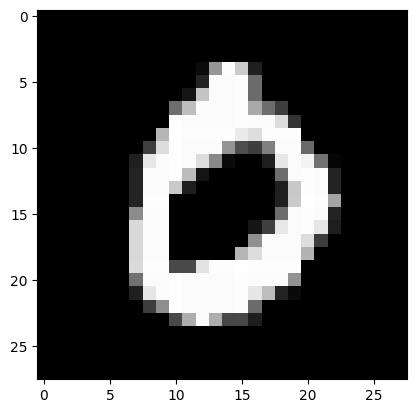

In [13]:
model.eval()
data, target = test_data[3]
data=data.unsqueeze(0).to(device)
output = model(data)
prediction=output.argmax(dim=1, keepdim=True).item()
print(f"prediction: {prediction}")
image=data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()
      